# Machine Learning - Regression
* ## House Price Prediction

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

house = load_boston() #load sklearn boston data

In [2]:
df = pd.DataFrame(house.data, columns=house.feature_names) #create dataframe
df['MEDV'] = house.target
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [3]:
#check rows and columns
print(house.data.shape) 
print(house.target.shape)

(506, 13)
(506,)


In [4]:
#check null value
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.describe()#stat

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<AxesSubplot:>

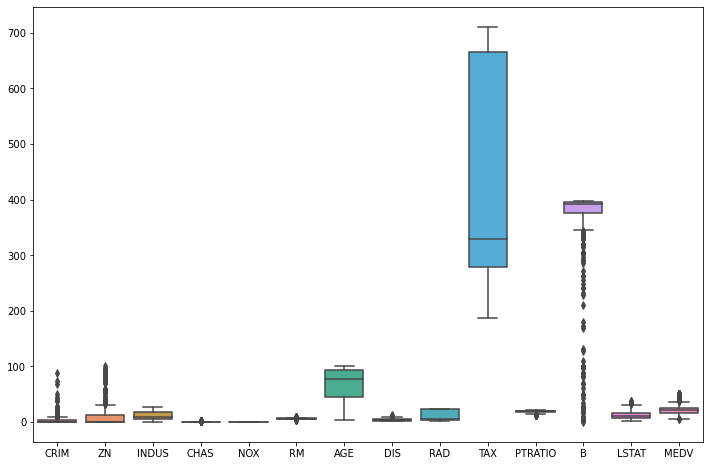

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df)

Text(0.5, 0, 'Median Price ($1000)')

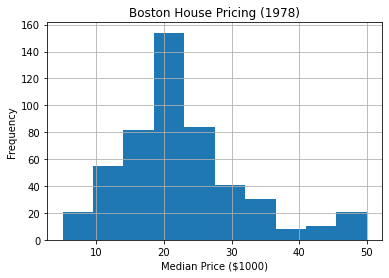

In [7]:
df.MEDV.hist()
plt.title('Boston House Pricing (1978)')
plt.ylabel('Frequency')
plt.xlabel('Median Price ($1000)')

<AxesSubplot:>

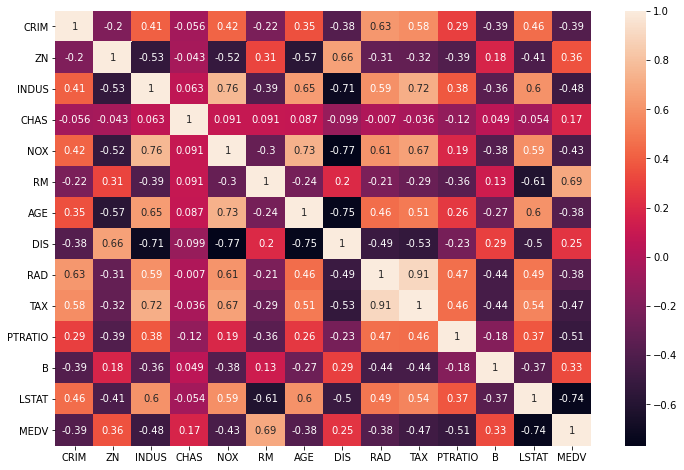

In [8]:
#heat map
fig, ax = plt.subplots(figsize=(12, 8))
corr_matrix = df.corr().round(3)
sns.heatmap(data=corr_matrix, annot = True) #LSAT vs MEDV ; MEDV vs RM

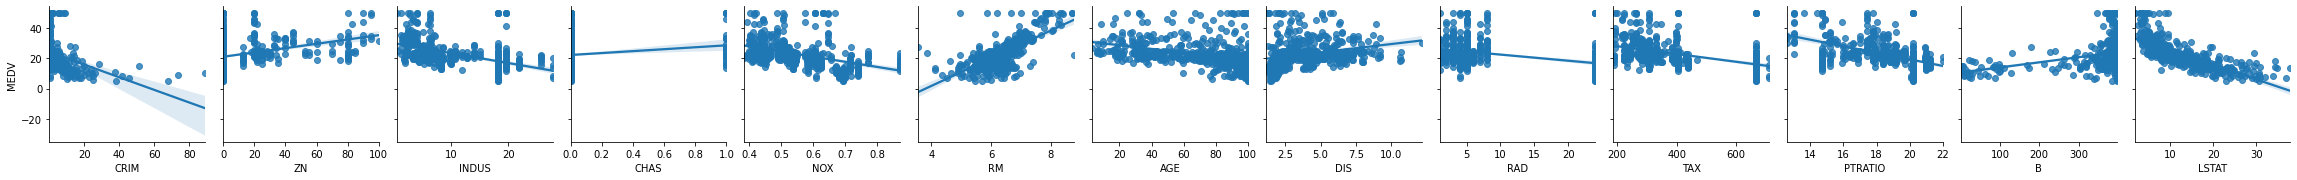

In [9]:
sns.pairplot(df, x_vars=house.feature_names, y_vars=['MEDV'], kind='reg')

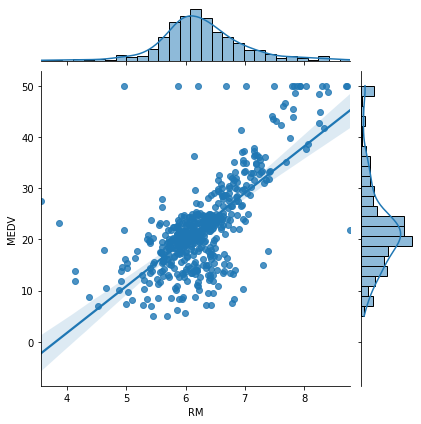

In [10]:
sns.jointplot(x=df.RM, y=df.MEDV, kind='reg')

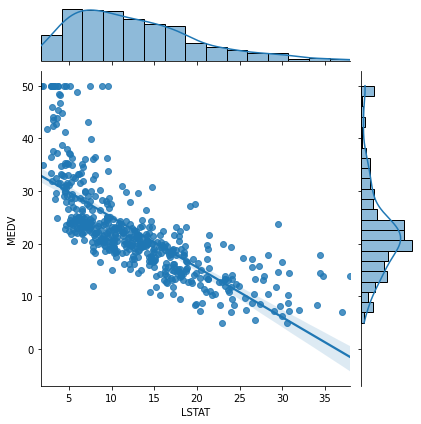

In [11]:
sns.jointplot(x=df.LSTAT, y=df.MEDV, kind='reg')

In [12]:
X = df.drop('MEDV', axis=1)
y = house.target

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #scaling
m = MinMaxScaler().fit(X)
X_processed = m.transform(X)

df_scaled = pd.DataFrame(X_processed, columns=X.columns)
df_scaled

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266  0.125072   

          RAD       TAX   PTRATIO         B     LSTAT  
0    0.000000  0.208015  0.287234  1.000000  0.089680  
1    0.043478  0.104962  0.553191  1.000000  0.204470  
2    0.043478  0.104962  0.553191  0.989737  0.063466  
3    0.086957  0.066794  0.648936  0.994276  0.033389  
4    0.086957  0.066794  0.648936  1.000000  0.099338  
..        ...       ...       ...       ...       ...  
501  0.000000  0.164122  0.893617  0.987619  0.219095  
502  0.000000  0.164122  0.893617  1.000000  0.202815  
503  0.000000  0.164122  0.893617  1.000000  0.107892  
504  0.000000  0.164122  0.893617  0.991301  0.131071  
505  0.000000  0.164122  0.893617  1.000000  0.169702  

[506 rows x 13 columns]

<AxesSubplot:>

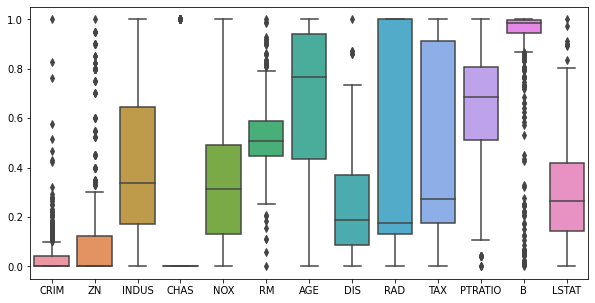

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_scaled)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=8)

In [16]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(354, 13)
(152, 13)
(354,)
(152,)


In [17]:
#Predict on the test set, Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = reg.score(X_test, y_test) # evaluate the performance, max=1
mse = mean_squared_error(y_test, y_pred) #computer mse
rmse = np.sqrt(mse)

print(r2)
print(rmse)

0.7080516940202748
4.86992617257013


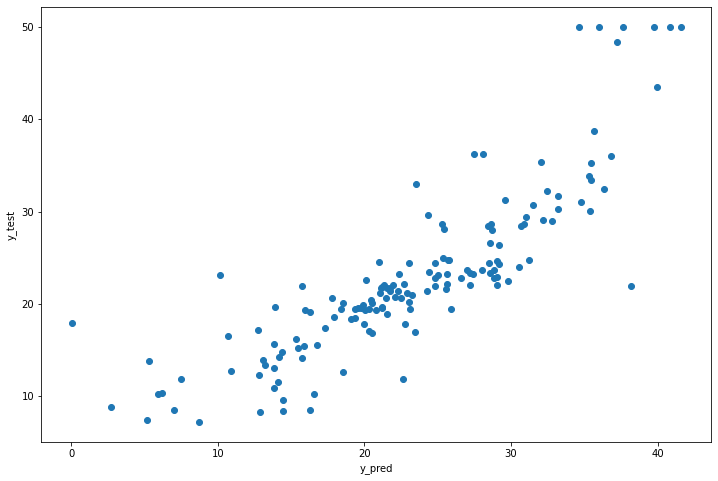

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show() 

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pred_data =[[0.0324, 0.0, 3.5, 0.0, 0.532, 6.921, 54.2, 4.02, 3.0, 296.0, 17.2, 396.90, 9.14]]
pred_data_processed = m.transform(pred_data)
price_pred = reg.predict(pred_data_processed)
print(price_pred*1000) #predicted price

[27641.10290609]
